In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
#target value counts
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact','koi_duration', 'koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',  'koi_slogg', 
       'koi_srad',  'ra', 'dec','koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
target = df['koi_disposition']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(selected_features,target,test_size = 0.2)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
420,0,0,0,0,17.444860,141.680200,0.871,4.4450,826.9,3.24,679,50.32,46.0,1,5568,4.413,0.966,294.84384,44.077679,15.007
1312,0,0,0,0,9.693108,134.530030,0.534,2.7340,1130.7,2.12,609,32.40,30.4,1,4818,4.639,0.618,291.80801,38.622700,15.914
2595,0,0,0,0,18.396297,185.139460,0.872,2.7838,680.2,2.47,582,27.09,58.4,1,5316,4.570,0.804,284.38617,45.719711,13.704
6372,1,0,0,1,0.566809,131.796950,0.484,3.1560,69.5,0.55,1656,1790.30,21.0,1,4987,4.611,0.654,291.31940,42.549500,14.873
6,0,0,0,0,16.068647,173.621937,0.052,3.5347,4914.3,5.76,600,30.75,161.9,1,5031,4.485,0.848,286.99948,48.375790,15.841


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
# Use all data for X scaler
X_scaler = MinMaxScaler().fit(selected_features)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model
## K Nearest Neighbors

Text(0, 0.5, 'Error Rate')

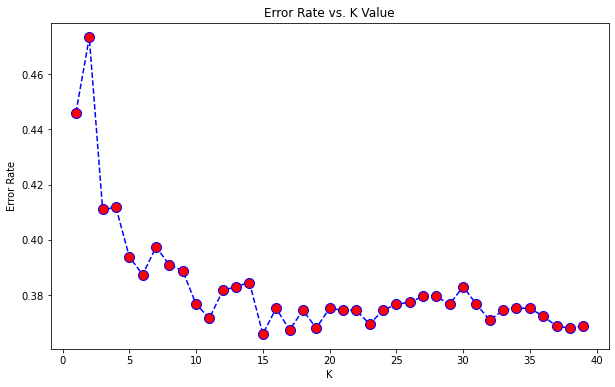

In [15]:
#elbow method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### The optimal value of K is 15. The graph of the error rate increases after 20.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled,y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k},Train/Test Score: {train_score:.3f}/{test_score:.3f}")   

k: 1,Train/Test Score: 1.000/0.769
k: 3,Train/Test Score: 0.892/0.785
k: 5,Train/Test Score: 0.863/0.781
k: 7,Train/Test Score: 0.850/0.797
k: 9,Train/Test Score: 0.842/0.793
k: 11,Train/Test Score: 0.838/0.801
k: 13,Train/Test Score: 0.829/0.793
k: 15,Train/Test Score: 0.828/0.793
k: 17,Train/Test Score: 0.827/0.793
k: 19,Train/Test Score: 0.823/0.793
k: 21,Train/Test Score: 0.825/0.791
k: 23,Train/Test Score: 0.821/0.795
k: 25,Train/Test Score: 0.819/0.790
k: 27,Train/Test Score: 0.815/0.782
k: 29,Train/Test Score: 0.816/0.784
k: 31,Train/Test Score: 0.813/0.782
k: 33,Train/Test Score: 0.814/0.784
k: 35,Train/Test Score: 0.815/0.789
k: 37,Train/Test Score: 0.813/0.787
k: 39,Train/Test Score: 0.811/0.791


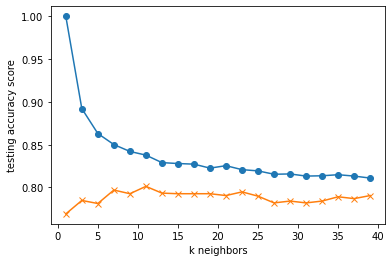

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,40,2),train_scores,marker='o')
plt.plot(range(1,40,2),test_scores,marker = 'x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_scaled,y_train)
print(f"Training Data Score for n=15: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score for n=15: {knn.score(X_test_scaled, y_test)}")

Training Data Score for n=15: 0.8279685264663805
Testing Data Score for n=15: 0.7927090779127949


In [19]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"actual":y_test,"prediction":predictions},columns = ["actual","prediction"]).head(20)

,actual,prediction
3059,CANDIDATE,CONFIRMED
860,FALSE POSITIVE,FALSE POSITIVE
688,FALSE POSITIVE,FALSE POSITIVE
2215,CONFIRMED,CANDIDATE
6463,FALSE POSITIVE,FALSE POSITIVE
2476,CONFIRMED,CANDIDATE
5593,FALSE POSITIVE,FALSE POSITIVE
3428,CANDIDATE,CONFIRMED
4908,CANDIDATE,CANDIDATE
2900,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)